In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header = None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [6]:
data.values

array([[ 74.  ,  -7.82,   8.79, ...,  99.  ,  99.  ,  99.  ],
       [100.  ,   4.08,  -0.29, ...,   0.34,  -4.32,   1.07],
       [ 49.  ,  99.  ,  99.  , ...,  99.  ,  99.  ,  99.  ],
       ...,
       [ 39.  ,  99.  ,  99.  , ...,  99.  ,  99.  ,  99.  ],
       [ 37.  ,  99.  ,  99.  , ...,  99.  ,  99.  ,  99.  ],
       [ 72.  ,   2.43,   2.67, ...,  99.  ,  99.  ,  99.  ]])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [8]:
data.values[4231,90]

3.2

In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,...,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,...,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,...,4.760000,3.59000,4.610000,3.250000,3.160000,3.300000,3.590000,2.670000,1.335000,3.930000
50%,72.000000,5.050000,3.690000,4.660000,3.450000,1.120000,3.540000,-0.050000,-0.290000,4.030000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,100.000000,99.000000,99.000000,99.000000,99.000000,4.470000,8.010000,3.930000,3.060000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [10]:
pd.options.display.max_columns = None
display(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,8.74,6.41,-6.36,-4.51,2.04,8.74,3.30,8.01,7.82,-1.89,3.25,2.18,1.26,8.35,3.35,-2.14,-7.91,-6.46,-3.40,5.58,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45

In [11]:
data.drop(0 , axis = 1, inplace = True)

In [12]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,7.28,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,3.45,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [13]:
data1 = data.replace(99, np.nan)

In [14]:
display(data1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,7.52,9.27,9.27,NaN,9.27,NaN,6.17,7.33,9.08,7.28,NaN,NaN,7.28,7.33,NaN,7.23,NaN,NaN,NaN,9.27,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,NaN,1.55,NaN,NaN,NaN,6.84,6.84,-3.98,6.99,3.45,NaN,6.94,1.55,7.67,NaN,6.55,NaN,NaN,NaN,NaN,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,8.74,6.41,-6.36,-4.51,2.04,8.74,3.30,8.01,7.82,-1.89,3.25,2.18,1.26,8.35,3.35,-2.14,-7.91,-6.46,-3.40,5.58,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,9.13,8.64,8.93,8.74,2.77,8.93,-9.03,8.06,7.77,7.48,8.20

In [15]:
type(data1)

pandas.core.frame.DataFrame

In [16]:
#### Find the best and worst rated joke. Therefore, find the highest and lowest mean of each column. Then get ID for these
#means: 
joke_means = data1.mean(axis = 0)
joke_means

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [17]:
type(joke_means)

pandas.core.series.Series

In [18]:
best_joke = max(joke_means)
best_joke

3.6650848950824937

In [19]:
worst_joke = min(joke_means)
worst_joke

-3.8338796373689923

In [20]:
best_joke_id = joke_means.idxmax()
best_joke_id

50

In [21]:
worst_joke_id = joke_means.idxmin()
worst_joke_id

58

In [22]:
arr = data1.values
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [23]:
data1 = data1.to_numpy()

In [24]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(new_data))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])


In [25]:
new_arr, idx = replace(data1, 0.1)

In [26]:
new_arr


array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [99.  , -0.29,  6.36, ...,  0.34, 99.  ,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [27]:

data1[idx[0][0], idx[1][0]]

4.95

In [28]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [29]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [30]:
latent_item_features

array([[0.717, 0.157],
       [0.986, 0.168],
       [0.55 , 0.182],
       [0.127, 0.022],
       [0.621, 0.977],
       [0.337, 0.132],
       [0.618, 0.268],
       [0.818, 0.826],
       [0.71 , 0.627],
       [0.572, 0.244],
       [0.983, 0.854],
       [0.032, 0.47 ],
       [0.602, 0.867],
       [0.117, 0.573],
       [0.434, 0.819],
       [0.466, 0.602],
       [0.509, 0.919],
       [0.236, 0.338],
       [0.181, 0.581],
       [0.334, 0.747],
       [0.631, 0.896],
       [0.683, 0.15 ],
       [0.384, 0.907],
       [0.817, 0.691],
       [0.14 , 0.814],
       [0.566, 0.922],
       [0.545, 0.787],
       [0.066, 0.971],
       [0.977, 0.339],
       [0.959, 0.753],
       [0.889, 0.22 ],
       [0.896, 0.05 ],
       [0.322, 0.88 ],
       [0.744, 0.089],
       [0.8  , 0.684],
       [0.739, 0.326],
       [0.512, 0.415],
       [0.947, 0.942],
       [0.079, 0.089],
       [0.599, 0.443],
       [0.892, 0.432],
       [0.986, 0.616],
       [0.661, 0.724],
       [0.4

In [31]:
latent_user_preferences 

array([[0.259, 0.603],
       [0.229, 0.432],
       [0.026, 0.283],
       ...,
       [0.272, 0.287],
       [0.026, 0.929],
       [0.621, 0.124]])

In [32]:

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.281, 0.357, 0.252, ..., 0.097, 0.492, 0.124],
       [0.232, 0.298, 0.205, ..., 0.084, 0.363, 0.106],
       [0.063, 0.073, 0.066, ..., 0.015, 0.208, 0.021],
       ...,
       [0.24 , 0.316, 0.202, ..., 0.094, 0.27 , 0.117],
       [0.164, 0.181, 0.183, ..., 0.029, 0.667, 0.043],
       [0.465, 0.633, 0.364, ..., 0.204, 0.24 , 0.249]])

In [33]:
def predict_rating(user_id, item_id):

    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating!=99):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
        mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=790.300447
Iteration 1/10:	MSE=624.568059
Iteration 2/10:	MSE=557.001105
Iteration 3/10:	MSE=485.380394
Iteration 4/10:	MSE=452.328045
Iteration 5/10:	MSE=446.707735
Iteration 6/10:	MSE=451.999341
Iteration 7/10:	MSE=459.107894
Iteration 8/10:	MSE=466.794538
Iteration 9/10:	MSE=478.539195


ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

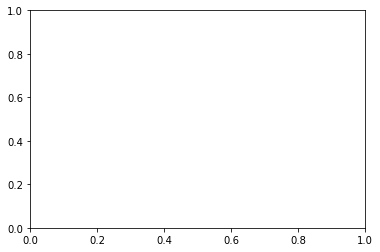

In [478]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [34]:

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.281, 0.357, 0.252, ..., 0.097, 0.492, 0.124],
       [0.232, 0.298, 0.205, ..., 0.084, 0.363, 0.106],
       [0.063, 0.073, 0.066, ..., 0.015, 0.208, 0.021],
       ...,
       [0.24 , 0.316, 0.202, ..., 0.094, 0.27 , 0.117],
       [0.164, 0.181, 0.183, ..., 0.029, 0.667, 0.043],
       [0.465, 0.633, 0.364, ..., 0.204, 0.24 , 0.249]])

In [35]:

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [36]:

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [37]:
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.28093599627109084)","(8.79, 0.3568902410363644)","(-9.66, 0.2522862717471238)","(-8.16, 0.04594134500272374)","(-7.52, 0.749721980456812)","(-8.5, 0.1672919051025066)","(-9.85, 0.3222117577008129)","(4.17, 0.7101635949206155)","(-8.98, 0.5616588918738075)","(-4.76, 0.29530960422367714)","(-8.5, 0.7693996436704648)","(-6.75, 0.29154316634134086)","(-7.18, 0.6785293001741987)","(8.45, 0.3755356908465749)","(-7.18, 0.6063134723688854)","(-7.52, 0.4835151010700453)","(-7.43, 0.6858086095816547)","(-9.81, 0.26522397652405993)","(-9.85, 0.3970438755341242)","(-9.85, 0.5369155721544593)","(-9.37, 0.7032563721003984)","(1.5, 0.2678995679161758)","(-4.37, 0.6460730616154041)","(-9.81, 0.6280720056246468)","(-8.5, 0.5266612025157291)","(1.12, 0.7021411429323379)","(7.82, 0.6157146297468419)","(2.86, 0.6017594422185065)","(9.13, 0.45780757824529394)","(-7.43, 0.7027172006526986)","(2.14, 0.36305835106950823)","(-4.08, 0.262457067127031)","(-9.08, 0.6139372883954172)","(7.82, 0.24676623414440507)","(5.05, 0.6198545179186443)","(4.95, 0.38811199372783456)","(-9.17, 0.3830427701362509)","(-8.4, 0.8134874775022463)","(-8.4, 0.07391188017388166)","(-8.4, 0.42203644268995266)","(-8.11, 0.4916104093154508)","(-9.13, 0.6267887867216873)","(-9.03, 0.607662129733387)","(-9.08, 0.428590494933436)","(-7.14, 0.3367248312111652)","(-6.26, 0.5068663569421641)","(3.79, 0.26362543248585046)","(-0.1, 0.4325334845715965)","(3.93, 0.3562089384586759)","(4.13, 0.3177679865124552)","(-8.69, 0.12271169041355695)","(-7.14, 0.41656511062172774)","(3.2, 0.5171812090162287)","(8.3, 0.32194154819741344)","(-4.56, 0.7249020142448541)","(0.92, 0.21782521023831175)","(-9.13, 0.6509188783948712)","(-9.42, 0.5372558343285423)","(2.82, 0.5862586458192732)","(-8.64, 0.32229702098616675)","(8.59, 0.5901248728208518)","(3.59, 0.7744703740444883)","(-6.84, 0.2302148718242421)","(-9.03, 0.7464886370472108)","(2.82, 0.4690723457041626)","(-1.36, 0.6483216159247079)","(-9.08, 0.6127015415028297)","(8.3, 0.243229805024901)","(5.68, 0.16690635611435062)","(-4.81, 0.5679339244605509)","(99.0, 0.23601701211135118)","(99.0, 0.349296204742603)","(99.0, 0.05725364430855614)","(99.0, 0.1839321461718819)","(99.0, 0.37621291308599036)","(99.0, 0.47254783681600204)","(99.0, 0.7459473501157741)","(-9.42, 0.12361636390161884)","(99.0, 0.7468859599582427)","(99.0, 0.17121059725072763)","(99.0, 0.3992381638158526)","(-7.72, 0.7343093839216667)","(99.0, 0.18159639534336305)","(99.0, 0.26216188544987257)","(99.0, 0.7427588577906056)","(99.0, 0.5448447197576445)","(99.0, 0.29291329743461597)","(99.0, 0.6492877024440507)","(99.0, 0.4961469406444952)","(99.0, 0.18011732560016977)","(2.82, 0.49879385488764405)","(99.0, 0.42562065734856325)","(99.0, 0.4903084229160929)","(99.0, 0.6804418995546715)","(99.0, 0.16839999946210363)","(99.0, 0.6850946310743066)","(-5.63, 0.5322355623144377)","(99.0, 0.09734543813482134)","(99.0, 0.49224267453147674)","(99.0, 0.12396234586079637)"
1,"(4.08, 0.2322968856353191)","(-0.29, 0.29834934198474633)","(6.36, 0.20454442461417047)","(4.37, 0.03838793323479693)","(-2.38, 0.5638990058952952)","(-9.66, 0.13444354128056266)","(-0.73, 0.2575801062937854)","(-5.34, 0.5441021275898195)","(8.88, 0.433033992800355)","(9.22, 0.23629225069952725)","(6.75, 0.593671544355773)","(8.64, 0.2102020713752206)","(4.42, 0.512065664004169)","(7.43, 0.2740674320310662)","(4.56, 0.45306552324777327)","(-0.97, 0.36652643253437184)","(4.66, 0.5132843367600591)","(-0.68, 0.20020454334033672)","(3.3, 0.2922089646989323)","(-1.21, 0.3990520075343914)","(0.87, 0.5310293362385488)","(8.64, 0.22149056340190945)","(8.35, 0.47936997666595255)","(9.17, 0.48523465050426456)","(0.05, 0.3832859396479849

In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Movies data starts here... 

In [49]:
data_movies_dict = {}
sheetname_list = ['Items', 'Users']
for sheet in sheetname_list:
    data_movies = pd.read_excel("C:\movies_latent_factors (1).xlsx", index_col = 0, sheet_name=sheetname_list)

In [50]:
data_movies.keys()

dict_keys(['Items', 'Users'])

In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(new_data))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [51]:
dt_u = data_movies['Users']

In [52]:
dt_u

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
User,,,,,,,,,,,,,,,
4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983


In [55]:
dt_u.shape

(25, 15)

In [53]:
dt_i = data_movies['Items']

In [56]:
dt_i.shape

(100, 16)

In [54]:
dt_i

,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,,
11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
22,Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265


In [76]:
dt_i.drop('Title' , axis = 1, inplace = True)

In [77]:
dt_i

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,
11,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
13,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
14,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
22,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
24,-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
38,-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
63,-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
77,-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265


In [523]:
factor4 = data_movies['Factor4']
factor4

Movie ID
11       0.247933
12       2.443297
13       0.614548
14       0.086197
22       0.073903
           ...   
9806     1.841867
10020    2.579640
36657   -0.885074
36658   -0.688808
36955   -0.491754
Name: Factor4, Length: 100, dtype: float64

In [525]:
low_fact4 = min(factor4)
low_fact4

-2.255945306069563

In [97]:
n_latent_factors = 15

user_ratings = dt_u.values
item_features = dt_i.values 
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((item_features.shape[0], n_latent_factors))

In [98]:
dt_i.values

array([[-1.522, -1.039,  2.027, ...,  0.404,  1.13 , -0.249],
       [-0.342, -0.297, -0.386, ..., -0.564,  0.507,  1.275],
       [-2.241, -0.439, -2.275, ..., -0.33 , -2.209, -0.419],
       ...,
       [ 0.812, -0.893,  0.669, ...,  0.642, -1.356,  0.068],
       [ 1.161, -0.716,  0.713, ...,  0.291, -1.217, -0.288],
       [ 1.734,  0.265, -0.003, ...,  0.334, -0.223, -0.023]])

In [100]:
item_features.shape

(100, 15)

In [101]:
latent_item_features

array([[0.785, 0.442, 0.943, ..., 0.648, 0.494, 0.171],
       [0.277, 0.824, 0.81 , ..., 0.763, 0.557, 0.769],
       [0.224, 0.156, 0.619, ..., 0.267, 0.712, 0.146],
       ...,
       [0.608, 0.376, 0.85 , ..., 0.139, 0.518, 0.95 ],
       [0.845, 0.405, 0.191, ..., 0.745, 0.814, 0.214],
       [0.335, 0.377, 0.508, ..., 0.51 , 0.674, 0.61 ]])

In [103]:
latent_user_preferences

array([[0.925, 0.122, 0.239, 0.492, 0.622, 0.758, 0.057, 0.666, 0.834,
        0.26 , 0.94 , 0.984, 0.863, 0.22 , 0.425],
       [0.586, 0.123, 0.985, 0.032, 0.026, 0.25 , 0.017, 0.699, 0.522,
        0.101, 0.012, 0.821, 0.699, 0.983, 0.727],
       [0.2  , 0.448, 0.97 , 0.303, 0.035, 0.552, 0.348, 0.231, 0.411,
        0.52 , 0.521, 0.462, 0.605, 0.071, 0.314],
       [0.045, 0.97 , 0.385, 0.403, 0.655, 0.944, 0.137, 0.139, 0.45 ,
        0.193, 0.825, 0.455, 0.304, 0.358, 0.561],
       [0.491, 0.265, 0.602, 0.083, 0.346, 0.222, 0.016, 0.601, 0.712,
        0.133, 0.787, 0.976, 0.095, 0.677, 0.385],
       [0.791, 0.613, 0.545, 0.23 , 0.796, 0.518, 0.56 , 0.585, 0.312,
        0.294, 0.836, 0.224, 0.081, 0.472, 0.699],
       [0.209, 0.414, 0.154, 0.767, 0.28 , 0.209, 0.26 , 0.762, 0.553,
        0.103, 0.817, 0.757, 0.994, 0.231, 0.695],
       [0.254, 0.598, 0.373, 0.077, 0.437, 0.287, 0.934, 0.961, 0.071,
        0.913, 0.878, 0.295, 0.101, 0.95 , 0.836],
       [0.053, 0.191, 0.

In [109]:
latent_user_preferences.shape

(25, 15)

In [127]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[5.192, 4.202, 3.547, ..., 3.703, 4.263, 3.893],
       [3.866, 3.495, 2.962, ..., 3.478, 3.025, 3.528],
       [3.834, 3.436, 2.585, ..., 3.176, 2.733, 2.856],
       ...,
       [4.942, 3.915, 2.844, ..., 2.967, 3.809, 3.501],
       [3.942, 2.903, 3.383, ..., 3.391, 3.16 , 2.878],
       [5.145, 4.928, 3.104, ..., 3.972, 4.332, 4.216]])

In [ ]:
## So i have created the randonly generated objects for latent user prefences and item features. Please advise as to 
#what to do next as I am completely lost. I contemaplted just multipying the original matrices to make predictions 
#but i figured it would not be this easy. any helped would be apprecaited. 